In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
data = pd.read_excel("../data/default of credit card clients.xls")

In [4]:
pd.set_option("Max_columns",None)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
data.shape

(30000, 24)

In [6]:
data.isna().any().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [8]:
from pandas.plotting import scatter_matrix

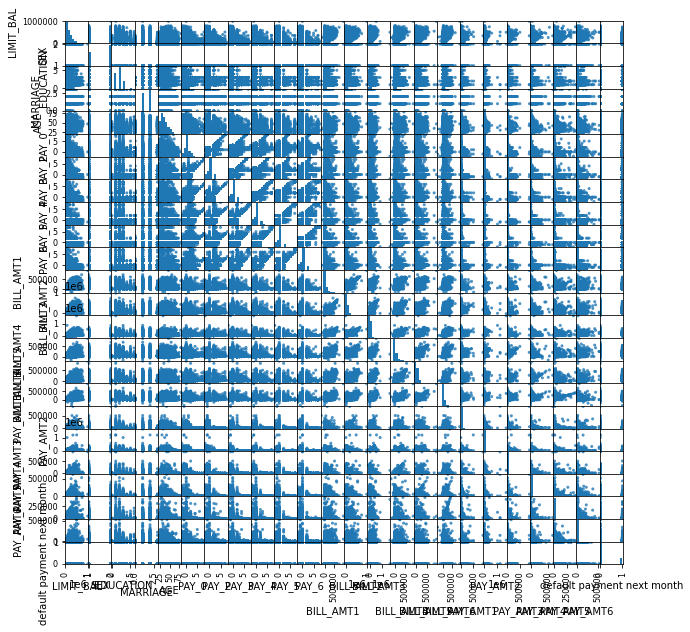

In [13]:
scatter_matrix(data, figsize=(10,10),alpha = 0.8)
plt.show()

From the pair-plot above, we can see that there is some relationship between the feature columns. To confirm that we’d plot a correlation heatmap.

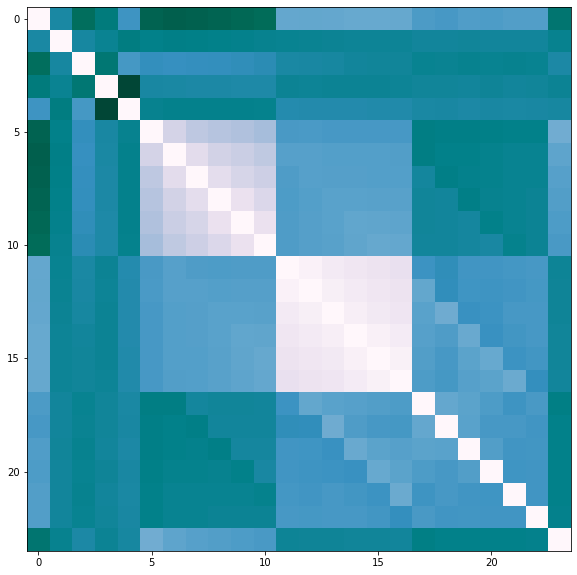

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(data.corr(), cmap='PuBuGn_r')

plt.show()

From the correlation heatmap above, it can be seen that there are some relationships between the feature columns, they are not entirely independent.

But in this scenario, there is a correlation because a customer who was not able to pay the bill for 1 month was again not able to pay it for the subsequent months and hence the correlation.

Again for the bill amount column, the same has happened. If the customer was not able to pay the bill, then the bill amount almost remained the same, or if the customer was able to pay then the bill amount got reduced.

We remove columns when they convey the same information. But here, dropping the columns shall result in the loss of bill and payment history data. So, we don’t need to drop any column although there is a correlation.

In [20]:
x=data.drop(labels=['default payment next month'],axis=1)
y=data['default payment next month']

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y ,test_size = 0.33, random_state = 42)

In [24]:
print(x_train.shape)
print(x_test.shape)

(20100, 23)
(9900, 23)


In [25]:
from sklearn.preprocessing import StandardScaler
train_Scalar = StandardScaler()
test_Scalar = StandardScaler()

In [26]:
scaled_train_data = train_Scalar.fit_transform(x_train)
scale_test_data = test_Scalar.fit_transform(x_test)

In [27]:
scale_train_df = pd.DataFrame(data =scaled_train_data, columns=x_train.columns, index = x_train.index )
scale_test_df = pd.DataFrame(data =scale_test_data, columns=x_test.columns, index = x_test.index )

In [28]:
scale_train_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
16831,-0.365093,-1.238563,1.448725,-1.054777,1.464785,0.015441,-0.724837,-0.697423,-0.668007,-0.647249,-0.615053,0.935500,-0.636379,-0.642576,-0.661257,-0.529514,-0.579208,-0.105018,-0.145558,-0.242409,0.201062,-0.014852,-0.233621
4222,-1.061279,-1.238563,-1.073197,0.861786,0.271955,1.794063,0.110028,0.141588,0.189890,0.238910,0.253471,0.256331,0.324404,0.228168,0.224623,0.099678,0.583327,-0.095828,-0.039170,0.152840,-0.212528,2.237818,0.268573
8736,-0.597155,0.807387,0.187764,0.861786,0.380394,0.015441,0.110028,0.141588,0.189890,0.238910,0.253471,-0.071392,-0.054757,-0.067356,-0.081444,-0.154738,-0.181984,-0.213650,-0.157335,-0.219417,-0.239691,-0.231210,-0.254511
27880,-0.287739,0.807387,1.448725,-1.054777,-1.029313,0.015441,0.110028,1.819611,1.905684,2.011229,0.253471,0.961297,1.127461,1.169781,1.409281,1.438216,1.562072,0.316551,-0.133702,0.207584,-0.302252,0.074237,-0.012958
29290,-0.906571,-1.238563,1.448725,0.861786,-1.029313,1.794063,0.110028,0.141588,0.189890,0.238910,0.253471,-0.017655,0.648791,-0.068136,-0.166675,-0.389455,-0.369159,-0.210882,-0.010496,-0.213942,-0.228875,-0.268309,-0.257889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,-0.906571,-1.238563,0.187764,0.861786,-0.378679,0.015441,0.110028,0.141588,0.189890,0.238910,0.253471,0.021006,0.066011,0.128727,0.201954,-0.181383,-0.553489,-0.213650,-0.117947,-0.198012,-0.297827,-0.235410,3.839564
5390,0.253740,-1.238563,-1.073197,0.861786,0.163516,1.794063,1.779758,1.819611,1.905684,2.011229,1.990517,1.450220,1.661058,1.754294,1.895071,2.130740,2.256508,0.463829,0.000218,-0.285109,0.158658,0.074237,-0.069264
860,-0.906571,-1.238563,-1.073197,0.861786,-1.029313,-1.763180,-1.559703,-1.536434,-1.525905,-1.533408,-1.483576,-0.695608,-0.690644,-0.675622,-0.673460,-0.664976,-0.657092,-0.331473,-0.236112,-0.285109,-0.302252,-0.307572,-0.294488
15795,-0.751863,0.807387,0.187764,0.861786,-1.137752,0.015441,0.110028,0.141588,0.189890,2.011229,1.990517,0.314125,0.304414,0.062534,-0.123997,-0.191390,-0.182356,-0.154739,-0.157335,-0.038763,-0.228507,-0.307572,-0.226921


In [29]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [32]:
y_pred = gnb.fit(scale_train_df, y_train).predict(scale_test_df)

In [33]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)

In [35]:
accuracy

0.6603030303030303

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid = {"var_smoothing":[1e-9,0.1, 0.001, 0.5,0.05,0.01,1e-8,1e-7,1e-6,1e-10,1e-11]}
grid_obj = GridSearchCV(estimator=gnb, param_grid=param_grid,cv=5, verbose=3 )

In [38]:
#find best param
grid_obj.fit(scale_train_df, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV] var_smoothing=1e-09 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. var_smoothing=1e-09, score=0.580, total=   0.4s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.665, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.714, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.646, total=   0.0s
[CV] var_smoothing=1e-09 .............................................
[CV] ................. var_smoothing=1e-09, score=0.689, total=   0.0s
[CV] var_smoothing=0.1 ...............................................
[CV] ................... var_smoothing=0.1, score=0.665, total=   0.0s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s



[CV] var_smoothing=0.1 ...............................................
[CV] ................... var_smoothing=0.1, score=0.743, total=   0.0s
[CV] var_smoothing=0.1 ...............................................
[CV] ................... var_smoothing=0.1, score=0.769, total=   0.0s
[CV] var_smoothing=0.1 ...............................................
[CV] ................... var_smoothing=0.1, score=0.740, total=   0.0s
[CV] var_smoothing=0.1 ...............................................
[CV] ................... var_smoothing=0.1, score=0.754, total=   0.0s
[CV] var_smoothing=0.001 .............................................
[CV] ................. var_smoothing=0.001, score=0.581, total=   0.0s
[CV] var_smoothing=0.001 .............................................
[CV] ................. var_smoothing=0.001, score=0.666, total=   0.0s
[CV] var_smoothing=0.001 .............................................
[CV] ................. var_smoothing=0.001, score=0.716, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    1.9s finished


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 0.1, 0.001, 0.5, 0.05, 0.01,
                                           1e-08, 1e-07, 1e-06, 1e-10, 1e-11]},
             verbose=3)

In [39]:
grid_obj.best_estimator_

GaussianNB(var_smoothing=0.5)

In [40]:
gnb_new = GaussianNB(var_smoothing=0.5)

In [41]:
y_pred_new = gnb_new.fit(scale_train_df,y_train).predict(scale_test_data)

In [42]:
new_acc = accuracy_score(y_test,y_pred_new)

In [43]:
new_acc

0.7798989898989899

In [44]:
param_grid_XGBOOST = {
    "n_estimators" : [50,100,130],
    "random_state":[0,50,100],
    "max_depth" : range(3,11,1)

}

In [46]:
!pip install xgboost

In [47]:
from xgboost import XGBClassifier

In [49]:
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid_XGBOOST, verbose=3,cv=5,n_jobs=-1)

In [50]:
grid.fit(scale_train_df,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 15.3min finished
C:\Users\hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:48:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [51]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
xgb_new=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, n_estimators=50, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [59]:
y_pred_xgb_new=xgb_new.fit(scale_train_df,y_train).predict(scale_test_df)

[22:54:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [61]:
ac_xgb_new=accuracy_score(y_test,y_pred_xgb_new)

In [62]:
ac_xgb_new

0.8227272727272728

In [63]:
xgb_ne2 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1,
              monotone_constraints='()', n_estimators=50, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)